## Bivariate transformations

- Suppose $(X, Y)$ is a bivariate random vector with join pdf/pmf
$f_{X,Y}(x, y)$
- Have seen already: If $X$ and $Y$ are **independent** then
    - $M_{X+Y}(t)=M_X(t)M_Y(t)$
- More generally: Let $U=g_1(X,Y)$ and $V=g_2(X,Y)$.
    - What is the joint distribution of $(U,V)$?
        - $P((U,V)\in B)=P((X,Y)\in A)$, 
            - where $A=\{(x,y):\big(g_1(x,y),g_2(x,y)\big)\in B\}$

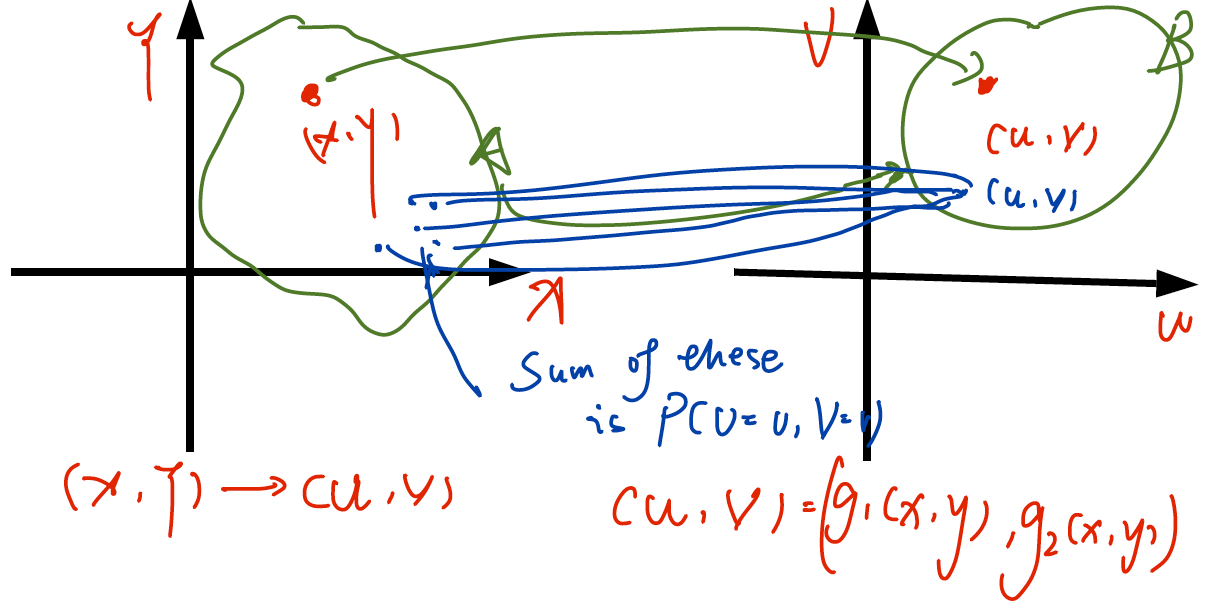

In [1]:
from IPython.display import Image
Image(filename="image\\4-3-1.jpg")

## Discrete case

- $U=g_1(X,Y)$ and $V=g_2(X,Y)$
    - $f_{U,V}(u,v)=P(U=u,V=v)=P((x,y)\in A_{uv})=\sum_{A_{uv}}f_{XY}(x,y)$,
    - where $A_{uv}=\{(x,y)|u=g_1(x,y),v=g_2(x,y)\}$
- I.E. just identify all the (x,y) that correspond to the (u,v) and add up the probabilities.

### Example: 2 dice
- We throw two dice and observe both $U =$ the sum and $V =$ the absolute difference.
    - $U = X + Y$ and $V = |X - Y|$
- Want the distribution of $(U,V)$ and the marginal distributions of $U$ and $V$.
- First: Let $X$ be the number of pips observed on die 1 and $Y$ be the number of pops observed on die 2. What is $f(x,y)$?
    - Two die independent
        - $f(x,y)=f_X(x)f_Y(y)=P(X=x)P(Y=y)=\frac{1}{6}\cdot\frac{1}{6}=\frac{1}{36}$
            - for $X=1,2,3,...,6$ and $Y=1,2,3,...,6$

$$(U,V)=(X+Y,|X-Y|)$$        

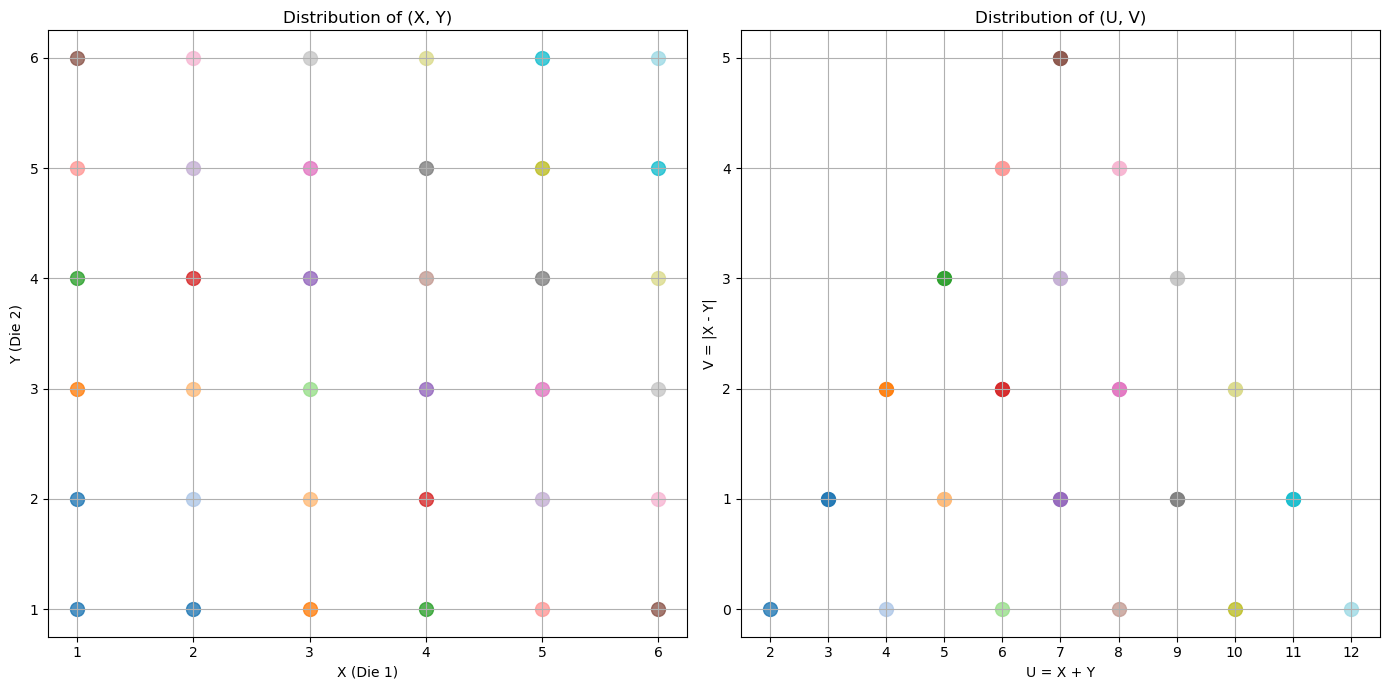

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Generate possible values for dice (1 to 6)
dice_values = np.arange(1, 7)

# Use Cartesian product to get all combinations of (X, Y)
X, Y = np.meshgrid(dice_values, dice_values)
X = X.ravel()
Y = Y.ravel()

# Define transformations
U = X + Y
V = np.abs(X - Y)

# Find unique (U, V) pairs and assign colors
unique_uv = np.unique(list(zip(U, V)), axis=0)
colors_dict = {tuple(uv): cm.tab20(i / len(unique_uv)) for i, uv in enumerate(unique_uv)}

# Create a plot
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Plot (X, Y) with colors based on the mapped (U, V)
for i in range(len(X)):
    uv = (U[i], V[i])
    color = colors_dict[uv]
    ax[0].scatter(X[i], Y[i], color=color, s=100, alpha=0.8)
ax[0].set_title("Distribution of (X, Y)")
ax[0].set_xlabel("X (Die 1)")
ax[0].set_ylabel("Y (Die 2)")
ax[0].grid(True)
ax[0].set_xticks(dice_values)
ax[0].set_yticks(dice_values)

# Plot (U, V) with the same colors
for i in range(len(U)):
    uv = (U[i], V[i])
    color = colors_dict[uv]
    ax[1].scatter(U[i], V[i], color=color, s=100, alpha=0.8)
ax[1].set_title("Distribution of (U, V)")
ax[1].set_xlabel("U = X + Y")
ax[1].set_ylabel("V = |X - Y|")
ax[1].grid(True)
ax[1].set_xticks(range(2, 13))
ax[1].set_yticks(range(0, 6))

plt.tight_layout()
plt.show()


- Possible outcome of $U$: 2, 3, 4,...,12
- Possible outcome of $V$: 0, 1, 2, 3, 4, 5
Grouping $(X,Y)$ outcomes with corresponding $(U,V)$ outcomes
- For example: $f(u=3,v=1)= \frac{2}{36}$

pmf of $(U,V)$ in table form:

|    f(u, v)    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   | 11   | 12   |  fV(v)  |
|-------------------|------|------|------|------|------|------|------|------|------|------|------|--------------|
| 0                 | 1/36 | 0/36 | 1/36 | 0/36 | 1/36 | 0/36 | 1/36 | 0/36 | 1/36 | 0/36 | 1/36 | 6/36         |
| 1                 | 0/36 | 2/36 | 0/36 | 2/36 | 0/36 | 2/36 | 0/36 | 2/36 | 0/36 | 2/36 | 0/36 | 10/36        |
| 2                 | 0/36 | 0/36 | 2/36 | 0/36 | 2/36 | 0/36 | 2/36 | 0/36 | 2/36 | 0/36 | 0/36 | 8/36         |
| 3                 | 0/36 | 0/36 | 0/36 | 2/36 | 0/36 | 2/36 | 0/36 | 2/36 | 0/36 | 0/36 | 0/36 | 6/36         |
| 4                 | 0/36 | 0/36 | 0/36 | 0/36 | 2/36 | 0/36 | 2/36 | 0/36 | 0/36 | 0/36 | 0/36 | 4/36         |
| 5                 | 0/36 | 0/36 | 0/36 | 0/36 | 0/36 | 2/36 | 0/36 | 0/36 | 0/36 | 0/36 | 0/36 | 2/36         |
|fU(u) |  1/36  | 2/36  | 3/36  | 4/36  | 5/36  | 6/36  | 5/36  | 4/36  | 3/36  | 2/36  | 1/36  |36/36|

## Example: Sum of Poisson's

- Let $X\sim Pois(\lambda_1)$ and $Y\sim Pois(\lambda_2)$, where $X$ and $Y$ are independent
- Want the distribution of $X+Y$
    - $(X,Y)\to(U,V)$
- General strategy to finding the distribution of $U=g(X,Y)$
    - Set $U=g(X,Y)$ and set $V=$ some simple function of $X$ and $Y$ that makes the bivariate transformation one-to-one. E.g. $V=Y$
    - Find the joint pmf of $U$ and $V$,$f_{u,v}(u,v)$
    - Then find the marginal pmf of $U$, $f_u(u)=\sum_vf_{u,v}(u,v)$
- Assume there are 2 independent poissons $X\sim Poisson(\lambda_1),Y\sim Poisson(\lambda_2)$
    - We want to prove $X+Y\sim Poisson(\lambda_1+\lambda_2)$
        - One way is to use mgf.
        - Another way is to use $(X,Y)\to(X+Y,Y)$, thus we set $(U,V)$ where $U=X+Y,V=Y$.
            - Firstly, determine the joint distribution of $(X,Y)$
            - $f_{X,Y}(x,y)=f_X(x)\cdot f_Y(y)$, where $x=0,1,2,...$ and $y=0,1,2,...$, since X and Y are independent.
            - $f_{X,Y}(x,y)=\frac{e^{-\lambda_1}\lambda_1^x}{x!}\frac{e^{-\lambda_2}\lambda_2^y}{y!}$
            - $A_{UV}=\{(x,y):u=g_1(x,y),v=g_2(x,y)\}=\{(u-v,v)\}$, where $g_1(x,y)=x+y$ adn $g_2(x,y)=y$.
            - That is to say: $y=v,x=u-y=u-v$.
            - $f_{U,V}(u,v)=f_{X,Y}(u-v,v)=\frac{e^{-\lambda_1}\lambda_1^{u-v}}{(u-v)!}\cdot\frac{e^{-\lambda_2}\lambda_2^{v}}{v!}=\frac{e^{-(\lambda_1+\lambda_2)}\lambda_1^{u-v}\lambda_2^v}{(u-v)!v!}$
            - Note: for Poisson distribution, $u-v\geq 0 \Rightarrow u\geq v$, or $y\leq x+y \Rightarrow u\geq v$.
            - The support: $u = 0,1,2,...$ and $v=0,1,2...,u$
    
        $\begin{aligned}
        f_{U}(u)
        &=\sum_{v}f_{U,V}(u,v)\\
        &=\sum_{v=0}^u \frac{e^{-(\lambda_1+\lambda_2)}\lambda_1^{u-v}\lambda_2^v}{(u-v)!v!}\\
        &=\frac{1}{u!}e^{-(\lambda_1+\lambda_2)}\sum_{v=0}^u\frac{u!}{(u-v)!v!}\lambda_1^{u-v}\lambda_2^v\\
        &=\frac{e^{-(\lambda_1+\lambda_2)}}{u!}\sum_{v=0}^u\binom{u}{v}\lambda_1^{u-v}\lambda_2^{v},\,\big(Binomial~Theorem:\sum_{x=0}^n\binom{n}{x}a^{n-x}b^x=(a+b)^n\big)\\
        &=\frac{e^{-(\lambda_1+\lambda_2)}}{u!}(\lambda_1+\lambda_2)^u,\,u=0,1,2...\\
        &=pmf~of~Poisson(\lambda_1+\lambda_2)
        \end{aligned}$

## Continuous case

- $U=g_1(X,Y)$ and $V=g_2(X,Y)$
- Let
    - $\mathcal{A}=\{(x,y):f_{X,Y}(x,y)>0\}$, which is support of $(x,y)$.
    - $\mathcal{B}=\{(u,v):u=g_1(x,y),v=g_2(x,y),for~some~(x,y)\in\mathcal{A}\}$.
- If $(g_1(x,y),g_2(x,y))$ is a **one-to-one** function from $\mathcal{A}$ to $\mathcal{B}$, then
    - $A_{uv}=\{(x,y):u=g_1(x,y),v=g_2(x,y)\}$ contains only one point.
    - i.e. only one $(x,y)$ for which $u=g_1(x,y)$ and $v=g_2(x,y)$
- Then we can find **Inverse functions**:
    - $x=h_1(u,v)$ and $y=h_2(u,v)$
- Jacobian:

    $J=\left|\begin{bmatrix}\frac{\partial x}{\partial u}&\frac{\partial x}{\partial v}\\\frac{\partial y}{\partial u}&\frac{\partial y}{\partial v}\end{bmatrix}\right|=\frac{\partial x}{\partial u}\frac{\partial y}{\partial v}-\frac{\partial y}{\partial u}\frac{\partial x}{\partial v}$

    where:

    $\frac{\partial x}{\partial u}=\frac\partial{\partial u}h_1(u,v),\quad\frac{\partial x}{\partial v}=\frac\partial{\partial v}h_1(u,v),\\\frac{\partial y}{\partial u}=\frac\partial{\partial u}h_2(u,v),\quad\frac{\partial y}{\partial v}=\frac\partial{\partial v}h_2(u,v),$

- One-to-one bivariate transformations

    $f_{U,V}(u,v)=f_{X,Y}(h_1(u,v),h_2(u,v))|J|$, for $(u,v)\in\mathcal{B}$

### Example:

- Let $X$ and $Y$ be independent and identically distributed (iid) random variables with $X\sim Expo(\beta)$ and $Y\sim Expo(\beta)$
- Set $U=\frac{X}{X+Y}$ and $V=X+Y$
    - Find the joint distribution of $(U,V)$ and the marginal distributions of $U$ and $V$.
    - Sum of exponentials: $X\sim Exp(\beta), Y\sim Exp(\beta)$, and they are independent.
    - $f_{X,Y}(x,y)=f_X(x)f_Y(y)=\frac{1}{\beta}e^{-x/\beta}\frac{1}{\beta}e^{-y/\beta}$, for $x>0,y>0$.
    - $u=\frac{x}{x+y}$ and $v=x+y \Rightarrow$
        - $x=uv=h_1(u,v)$ and $y=v-x=v(1-u)=h_2(u,v)$

            $\frac{\partial x}{\partial u}=\frac\partial{\partial u}h_1(u,v)=\frac\partial{\partial u}uv=v,\\
            \frac{\partial x}{\partial v}=\frac\partial{\partial v}h_1(u,v)=\frac\partial{\partial v}uv=u,\\
            \frac{\partial y}{\partial u}=\frac\partial{\partial u}h_2(u,v)=\frac\partial{\partial u}v(1-u)=-v,\\
            \frac{\partial y}{\partial v}=\frac\partial{\partial v}h_2(u,v)=\frac\partial{\partial v}v(1-u)=1-u$

            $J=\frac{\partial x}{\partial u}\frac{\partial y}{\partial v}-\frac{\partial y}{\partial u}\frac{\partial x}{\partial v}=v(1-u)-(-uv)=v$

        - Since $x>0,y>0$, we can get the support of $(u,y)$
            - $u=\frac{x}{x+y}\in(0,1)$ and $v=x+y\in(0,\infty)$

    $\begin{aligned}
    f_{U,V}(u,v)
    &=f_{X,Y}(h_1(u,v),h_2(u,v))|J|\\
    &=f_{X,Y}(uv,v(1-u))|v|\\
    &=\frac{1}{\beta^2}e^{-uv/\beta}e^{-v(1-u)/\beta}
    \end{aligned}$

    - According to the definition of Exponential distribution:
        - $f_{X,Y}(uv,v(1-u))\Rightarrow uv>0,v(1-u)>0\Rightarrow u<1$.
        - Thus, sum of all support of $u$ and $v$, we can still get that:
            - $u\in(0,1)$ and $v\in(0,\infty)$
    
    $f_{U,V}(u,v)=\frac{v}{\beta^2}e^{-v/\beta}I_{(0,1)}(u)I_{(0,\infty)(v)}$


        


- Notice:
    1. $U$ and $V$ are independent. !!!!
        - Since according to the Lemma, $f_{U,V}(u,v)=g(u)h(v),\forall u,v$, where 
            - $g(u)=I_{(0,1)}(u)$, which is pdf $Uniform(0,1)$
            - $h(v)=\frac{1}{\beta^2}ve^{-v/\beta}I_{(0,\infty)}(v)$, which is pdf of $Gamma(\alpha = 2,\beta)$.
    2. $U=\frac{X}{X+Y}\sim Uniform(0,1)$.
    3. $V=X+Y\sim Gamma(2,\beta)$。



### Example
- Let $X$ and $Y$ be independent and identically distributed (iid) random variables with $X\sim N(0,1)$ and $Y\sim N(0,1)$
- Find the distribution of $\frac{X}{Y}$
- The strategy is that set $U=\frac{X}{Y},V=Y$ to find the $f_U(u)$.
    - The support: $U,V\in\mathbb{R}^2$, because $X,Y\in\mathbb{R}^2$
    - Inverse function:
        - $x=uy=uv=h_1(u,v)$
        - $y=v=h_2(u,v)$
    - Jacobian:

        $\frac{\partial x}{\partial u}=\frac\partial{\partial u}h_1(u,v)=\frac\partial{\partial u}uv=v,\\
            \frac{\partial x}{\partial v}=\frac\partial{\partial v}h_1(u,v)=\frac\partial{\partial v}uv=u,\\
            \frac{\partial y}{\partial u}=\frac\partial{\partial u}h_2(u,v)=\frac\partial{\partial u}v=0,\\
            \frac{\partial y}{\partial v}=\frac\partial{\partial v}h_2(u,v)=\frac\partial{\partial v}v=1$
            
        $J=\frac{\partial x}{\partial u}\frac{\partial y}{\partial v}-\frac{\partial y}{\partial u}\frac{\partial x}{\partial v}=v\cdot 1-0\cdot u=v$

    - Since $X, Y$ are independent, thus

        $\begin{aligned}
        f_{X,Y}(x,y)
        &=f_X(x)f_Y(y)\\
        &=\frac{1}{\sqrt{2\pi}}e^{-x^2/2}\cdot \frac{1}{\sqrt{2\pi}}e^{-y^2/2}\\
        &=\frac{1}{2\pi}e^{-\frac{1}{2}(x^2+y^2)}
        \end{aligned}$

        $\begin{aligned}
        f_{U,V}(u,v)
        &=\frac{1}{2\pi}e^{-\frac{1}{2}(u^2v^2+v^2)}\cdot|v|,\,(u,v)\in\mathbb{R^2}\\
        \end{aligned}$

        $\begin{aligned}
        f_U(u)
        &=\int_{-\infty}^{\infty}f_{U,V}(u,v)dv\\
        &=\int_{-\infty}^{0}\frac{1}{2\pi}-ve^{-v^2\frac{u^2+1}{2}}dv + \int_{0}^{\infty}\frac{1}{2\pi}ve^{-v^2\frac{u^2+1}{2}}dv,\,\big(f(u,v)=f(u,-v),f~is~symmetric~around~v = 0\big)\\
        &=2\int_{0}^{\infty}\frac{1}{2\pi}ve^{-v^2\frac{u^2+1}{2}}dv\\
        &=\int_{0}^{\infty}\frac{1}{\pi}ve^{-v^2(\frac{u^2+1}{2})}dv,\,\big(\frac{d}{dv}e^{-v^2\cdot (\frac{u^2+1}{2})}=-2v(\frac{u^2+1}{2})e^{-v^2(\frac{u^2+1}{2})}\big)\\
        &=\frac{-1}{(u^2+1)\pi}\int_{0}^{\infty}-2v(\frac{u^2+1}{2})e^{-v^2(\frac{u^2+1}{2})}\\
        &=\frac{-1}{(u^2+1)\pi}\cdot e^{-v^2\cdot (\frac{u^2+1}{2})}|_0^{\infty}\\
        &=\frac{-1}{(u^2+1)\pi}(\lim_{v\to\infty}e^{-v^2\cdot (\frac{u^2+1}{2})}-e^0)\\
        &=\frac{1}{(u^2+1)\pi},for~u\in\mathbb{R},\,(pdf~of~Cauchy(0,1))
        \end{aligned}$

- $\frac{X}{Y}=U\sim Cauchy(0,1)$


## Hierarchical Models and Mixture distributions

- We can construct a joint pdf/pmf using a
    - conditional pdf/pmf and a marginal pdf/pmf
- From the definition of a conditional pmf/pdf follows:
    - $f(x,y)=f(x|y)f_Y(y)$
    - $f(x,y)=f(y|x)f_X(x)$
    - A powerful modeling tool - only have to think about one thing at a time.

### Example: Binomial - Poisson Mixture
- Say
    - $X$ = number of seeds that survive to become seedlings
    - $Y$ = number of seeds spread by a plant in a plot
- A reasonable model would be
    - $X|Y\sim Binomial(n = Y,p)$
    - $Y\sim Poisson(\lambda)$
- Can show that the marginal distribution of $X$ is $Poisson(\lambda p)$
    - This is a Binomial and Poisson Mixture Question

        $f_{X,Y}(x,y)=f(x|y)f(y)=\binom{y}{x}p^x(1-p)^{y-x}e^{-\lambda}\frac{\lambda^y}{y!}$

    - where
        - for $x=0,1,2,...,y$ and $y=0,1,2,...$ Or
        - for $x=0,1,2,...$ and $y=x,x+1,x+2,...$

        $f_X(x)=\sum_{y}f(x,y)=\sum_{y=x}^{\infty}\binom{y}{x}p^x(1-p)^{y-x}e^{-\lambda}\frac{\lambda^y}{y!}$
    - Summing over $y$, thus $x$ is a constant.

        $f_X(x)=e^{-\lambda}p^x\frac{1}{x!}\sum_{y=x}^{\infty}\frac{y!}{(y-x)!}\frac{\lambda^y}{y!}(1-p)^{y-x}$
    
    - Substitution $t=y-x\Rightarrow y=t+x$. Since $y=x,x+1,x+2,...$, then
        - we can get $t=0,1,2,...$
    
        $\begin{aligned}
        f_X(x)
        &=\frac{e^{-\lambda}p^x}{x!}\sum_{t=0}^{\infty}\frac{\lambda^{t+x}}{t!}(1-p)^t\\
        &=\frac{e^{-\lambda}p^x\lambda^x}{x!}e^{\lambda(1-p)}\sum_{t=0}^{\infty}\frac{(\lambda(1-p))^t}{t!}e^{-\lambda(1-p)},\,\big(CDF~of~Poisson(\lambda(1-p))=1\big)\\
        &=\frac{e^{-\lambda p}(\lambda p)^x}{x!},\,for~x=0,1,2,...\\
        &=PMF~of~Poisson(\lambda p)
        \end{aligned}$

### Poisson - Gamma Mixture = Negative binomial

- If $Y|X\sim Poisson(X)$ and $X\sim Gamma(\alpha,\beta)$, then
    - the marginal distribution of $Y$ is Negative Binomial.


## Finite Mixture Distributions

- Let $f_i(x),i=1,2,...,n$ be pdfs/pmf and let $p_i>0$ and $p_1+p_2+...+p_n=1$. Then,

    - $f(x)=p_1f_1(x)+p_2f_2(x)+...+p_nf_n(x)$ is also a pdf/pmf.

        $\begin{aligned}
        \int f(x)
        &=\int p_1f_1(x)+p_2f_2(x)+...+p_nf_n(x) dx\\
        &= p_1 \int f_1(x)+p_2 \int f_2(x)+...+p_n \int f_n(x)\\
        &= p_1+p_2+...+p_n\\
        &=1\Rightarrow f(x)~is~a~Pdf\\
        \end{aligned}$

    

## Iterative expections
- Can obtain marginal expectation and variance from a hierarchical model without first finding the marginal pdf or pmf.
- Theorem: Iterative Expectation
    - $E(X)=E(E(X|Y))$ or $E_X(X)=E_Y(E_{X|Y}(X|Y))$
        - $E(X)=E_X(X)=\int xf(x)dx$
        - $E(X|Y)=E_{X|Y}(X|Y)=\int xf(x|y)dx$
        - $E(Y)=E_Y(Y)=\int yf(y)dx$
    - Note the difference between $E(X|Y)$ and $E(X|Y=y)$ or $E(X|y)$
        - $E(X|Y)$ is a function of $Y$, since $E(X|Y)=\int xf(x|y)dx$, where $x$ will not exist after integral, and only $y$ exists.
        - $E(X|Y)$ is a random variable about $Y$.
        - $E(X|Y=y)$ is a scalar (whose value depends on $y$)
        - Example 2 in lecture 14:
            - $E(Y|X=x)=\frac{2}{3}x$, which is a scalar.
            -  $E(Y|X)=\frac{2}{3}X$, which is a random variable about $X$, and also a function of $X$.
        - $Var(X|Y)$ is also a random variable about $Y$ and also a function of $Y$.
    - Proof:

        $\begin{aligned}
        E(E_{X|Y}(X|Y))
        &=\int_{-\infty}^{\infty}E_{X|Y}(X|Y)f_Y(y)dy\\
        &=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} x f_{X|Y}(x|y) dx f_Y(y)dy\\
        &=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} x f_{X|Y}(x|y) f_Y(y) dx dy\\
        &=\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} x f(x,y) dx dy\\
        &=\int_{-\infty}^{\infty}x\int_{-\infty}^{\infty}f(x,y)dydx\\
        &=\int_{-\infty}^{\infty}xf_X(x)dx\\
        &=E(X)
        \end{aligned}$

## Iterative variances
- Theorem: Iterative variances
    - $V(X)=E(V(X|Y))+V(E(X|Y))$ or $V_X(X)=E_Y(V(X|Y))+V_Y(E(X|Y))$
        - Since Variance is never negative and $V(E(X|Y))\geq 0$, thus $V(X)\geq E(V(X|Y))$
    - Proof:
        
        Recall: $V(X)=E(X^2)-E(X)^2$
        
        $\begin{aligned}
        &E(V(X|Y))+V(E(E|Y)) \\
        &= E\big(E(X^2|Y)-E(X|Y)^2\big)+E\big(E(X|Y)^2\big)-E\big(E(X|Y)\big)^2,\, E(X)^2=E(E(X|Y))^2\\
        &= E\big(E(X^2|Y)\big)-E\big(E(X|Y)^2\big)+E\big(E(X|Y)^2\big)-E(X)^2,\, E(X^2)=E\big(E(X^2|Y)\big)\\
        &= E(X^2)-E(X)^2\\
        &= V(X)
        \end{aligned}$

### Example:
- Suppose $X|Y\sim Binomial(n,Y)$, $Y\sim Beta(\alpha,\beta)$
    - What is the (marginal) expected value and variance of $X$?
        - According to $X|Y\sim Binomial(n,Y)$:
            - $E(X|Y)=nY$
            - $V(X|Y)=nY(1-Y)$
        - According to $Y\sim Beta(\alpha,\beta)$:
            - $E(Y)=\frac{\alpha}{\alpha+\beta}$
            - $V(Y)=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$
            - $E(Y^2)=\frac{\alpha(\alpha+1)}{(\alpha+\beta)(\alpha+\beta+1)}$
        
        $\begin{aligned}
        E(X)&=E(E(X|Y))\\
            &=nE(Y)\\
            &=\frac{n\alpha}{\alpha+\beta}
        \end{aligned}$

        $\begin{aligned}
        V(X)
        &=E(V(X|Y))+V(E(X|Y))\\
        &=E(nY(1-Y))+V(nY)\\
        &=nE(Y)-nE(Y^2)+n^2V(Y)\\
        &=\frac{n\alpha\beta(n+\alpha+\beta)}{(\alpha+\beta)^{2}(\alpha+\beta+1)}
        \end{aligned}$

## Expand

Let's walk through the detailed derivation of the **Posterior Distribution** $ Y \mid X = x $ given the following:

- $ X \mid Y \sim \text{Binomial}(n, Y) $
- $ Y \sim \text{Beta}(\alpha, \beta) $

### 1. Bayes' Theorem
Bayes' theorem is expressed as:
$
P(Y \mid X = x) = \frac{P(X = x \mid Y) P(Y)}{P(X = x)}
$
Where:
- $ P(X = x \mid Y) $ is the likelihood function.
- $ P(Y) $ is the prior distribution of $ Y $.
- $ P(X = x) $ is the marginal probability of $ X = x $ (which acts as a normalizing constant).

We will derive each part.

### 2. Likelihood Function $ P(X = x \mid Y) $
Given that $ X \mid Y \sim \text{Binomial}(n, Y) $, the conditional probability $ P(X = x \mid Y = y) $ is the Binomial probability mass function:
$
P(X = x \mid Y = y) = \binom{n}{x} y^x (1 - y)^{n - x}
$

### 3. Prior Distribution $ P(Y) $
The prior distribution $ Y $ is Beta-distributed, $ Y \sim \text{Beta}(\alpha, \beta) $, with the probability density function:
$
P(Y = y) = \frac{y^{\alpha - 1} (1 - y)^{\beta - 1}}{B(\alpha, \beta)}
$
Where $ B(\alpha, \beta) $ is the Beta function, which will be used as a normalizing constant and will typically cancel out during the calculation of the posterior distribution.

### 4. Posterior Distribution $ P(Y \mid X = x) $
Substituting the likelihood function and the prior distribution into Bayes' theorem:

$
P(Y = y \mid X = x) \propto P(X = x \mid Y = y) P(Y = y)
$

Substitute the explicit expressions for the likelihood and prior:

$
P(Y = y \mid X = x) \propto \left[ \binom{n}{x} y^x (1 - y)^{n - x} \right] \cdot \left[ y^{\alpha - 1} (1 - y)^{\beta - 1} \right]
$

Since $ \binom{n}{x} $ is independent of $ y $, we can drop it as a constant for normalization. This gives us:

$
P(Y = y \mid X = x) \propto y^{x + \alpha - 1} (1 - y)^{n - x + \beta - 1}
$

This expression is in the form of a Beta distribution, specifically:

$
P(Y = y \mid X = x) \propto y^{(\alpha + x - 1)} (1 - y)^{(\beta + n - x - 1)}
$

Thus, the posterior distribution $ Y \mid X = x $ is:

$
Y \mid X = x \sim \text{Beta}(\alpha + x, \beta + n - x)
$

### 5. Normalization Constant
To fully normalize the posterior distribution, we would need to compute the marginal likelihood $ P(X = x) $. However, this constant does not affect the shape of the posterior distribution, and it is typically used just for normalization purposes. Since we already know the posterior distribution is a Beta distribution, the normalization constant will just scale the distribution so that its total probability equals 1.

Thus, the posterior distribution remains:

$
Y \mid X = x \sim \text{Beta}(\alpha + x, \beta + n - x)
$

### Summary
After applying Bayes' theorem, the posterior distribution of $ Y $ given $ X = x $ is:

$
Y \mid X = x \sim \text{Beta}(\alpha + x, \beta + n - x)
$ 

This result is a **Beta distribution** with updated parameters $ \alpha + x $ and $ \beta + n - x $, where $ x $ is the observed number of successes.
